# FinLoan AI - Complete Loan Prediction Analysis
## Real Dataset Analysis & Machine Learning Implementation
### Author: Tejas Panchal
### Date: October 2025

## 1. Data Loading and Initial Exploration

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the loan dataset
df = pd.read_csv('../data/loan_dataset.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

# Display first few rows
df.head()

Dataset loaded successfully!
Dataset shape: (614, 13)

Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 2. Data Quality Assessment

In [3]:
# Basic information about the dataset
print("=== DATASET INFORMATION ===")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
print("\n=== DATA TYPES ===")
print(df.dtypes)

print("\n=== MISSING VALUES ===")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)

print(missing_summary[missing_summary['Missing Count'] > 0])

=== DATASET INFORMATION ===
Shape: (614, 13)
Memory usage: 278.74 KB

=== DATA TYPES ===
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

=== MISSING VALUES ===
                  Missing Count  Missing Percentage
Credit_History               50            8.143322
Self_Employed                32            5.211726
LoanAmount                   22            3.583062
Dependents                   15            2.442997
Loan_Amount_Term             14            2.280130
Gender                       13            2.117264
Married                       3            0.488599


In [4]:
# Statistical summary
print("=== STATISTICAL SUMMARY ===")
print("\nNumerical Features:")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(df[numerical_cols].describe())

print("\nCategorical Features:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

=== STATISTICAL SUMMARY ===

Numerical Features:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  

Categorical Features:

Loan_ID:
Loan_ID
LP001002    1
LP00

## 3. Exploratory Data Analysis (EDA)

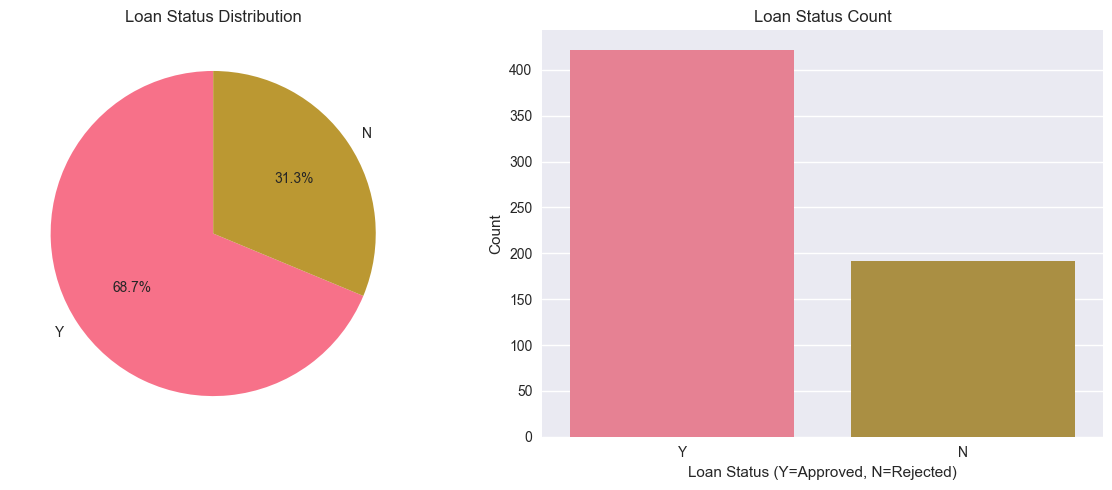

Loan Status Distribution:
Loan_Status
Y    422
N    192
Name: count, dtype: int64

Percentage:
Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64


In [5]:
# Target variable distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
loan_status_counts = df['Loan_Status'].value_counts()
plt.pie(loan_status_counts.values, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Status Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Loan_Status')
plt.title('Loan Status Count')
plt.xlabel('Loan Status (Y=Approved, N=Rejected)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

print("Loan Status Distribution:")
print(df['Loan_Status'].value_counts())
print("\nPercentage:")
print(df['Loan_Status'].value_counts(normalize=True) * 100)

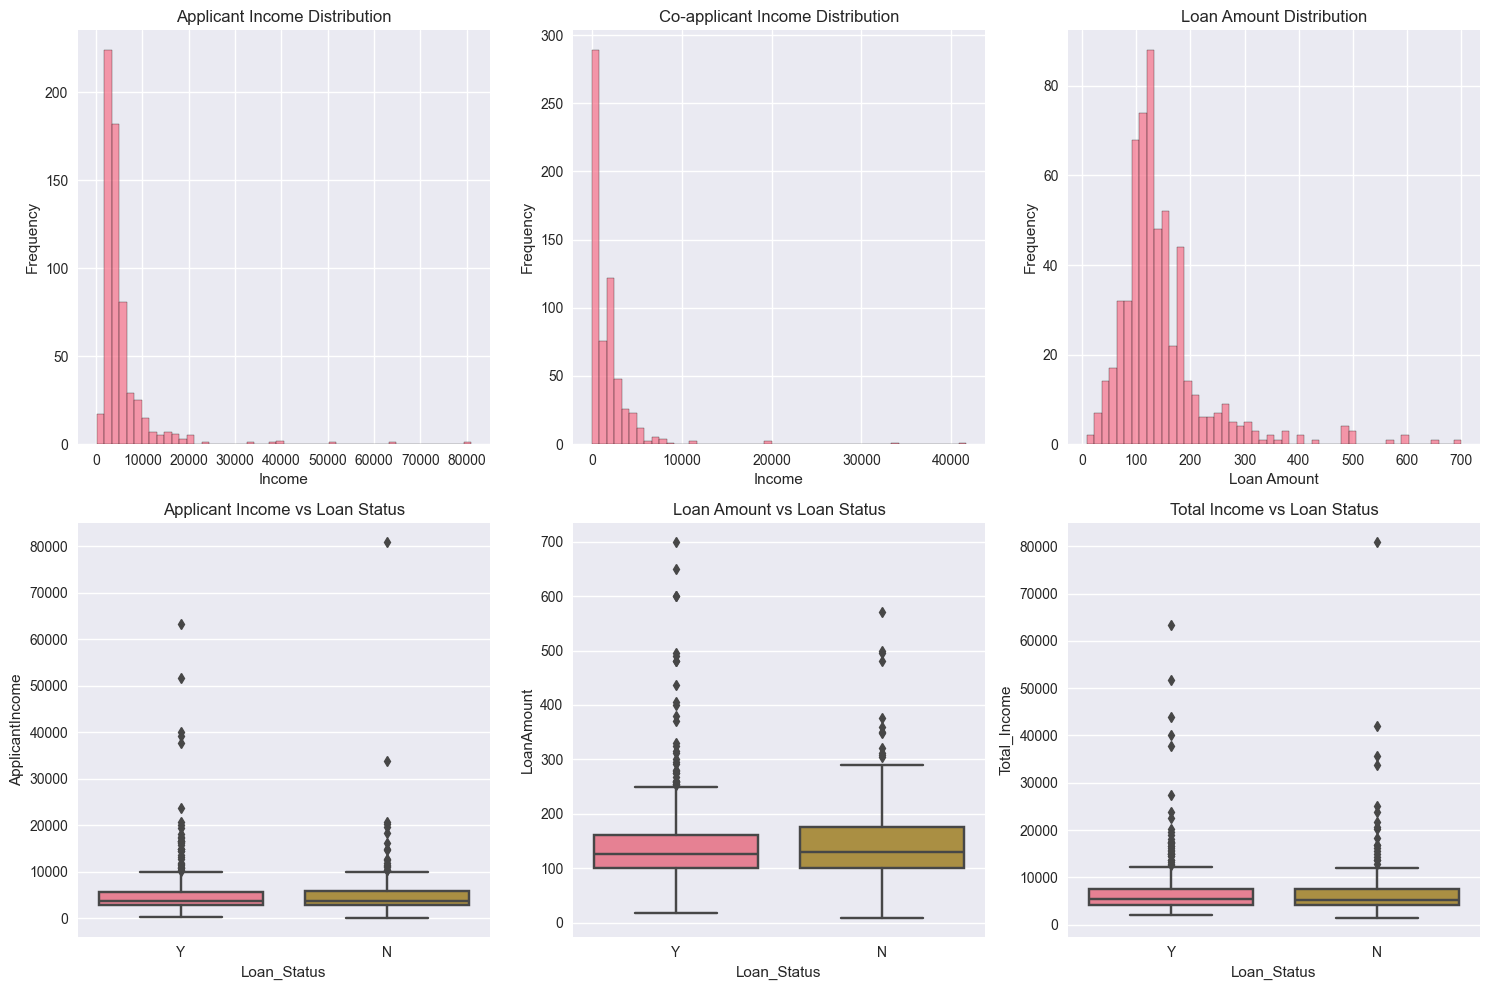

In [6]:
# Income analysis
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(df['ApplicantIncome'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Applicant Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.hist(df['CoapplicantIncome'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Co-applicant Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.hist(df['LoanAmount'].dropna(), bins=50, alpha=0.7, edgecolor='black')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Loan_Status', y='ApplicantIncome')
plt.title('Applicant Income vs Loan Status')

plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='Loan_Status', y='LoanAmount')
plt.title('Loan Amount vs Loan Status')

plt.subplot(2, 3, 6)
# Create total income for analysis
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
sns.boxplot(data=df, x='Loan_Status', y='Total_Income')
plt.title('Total Income vs Loan Status')

plt.tight_layout()
plt.show()

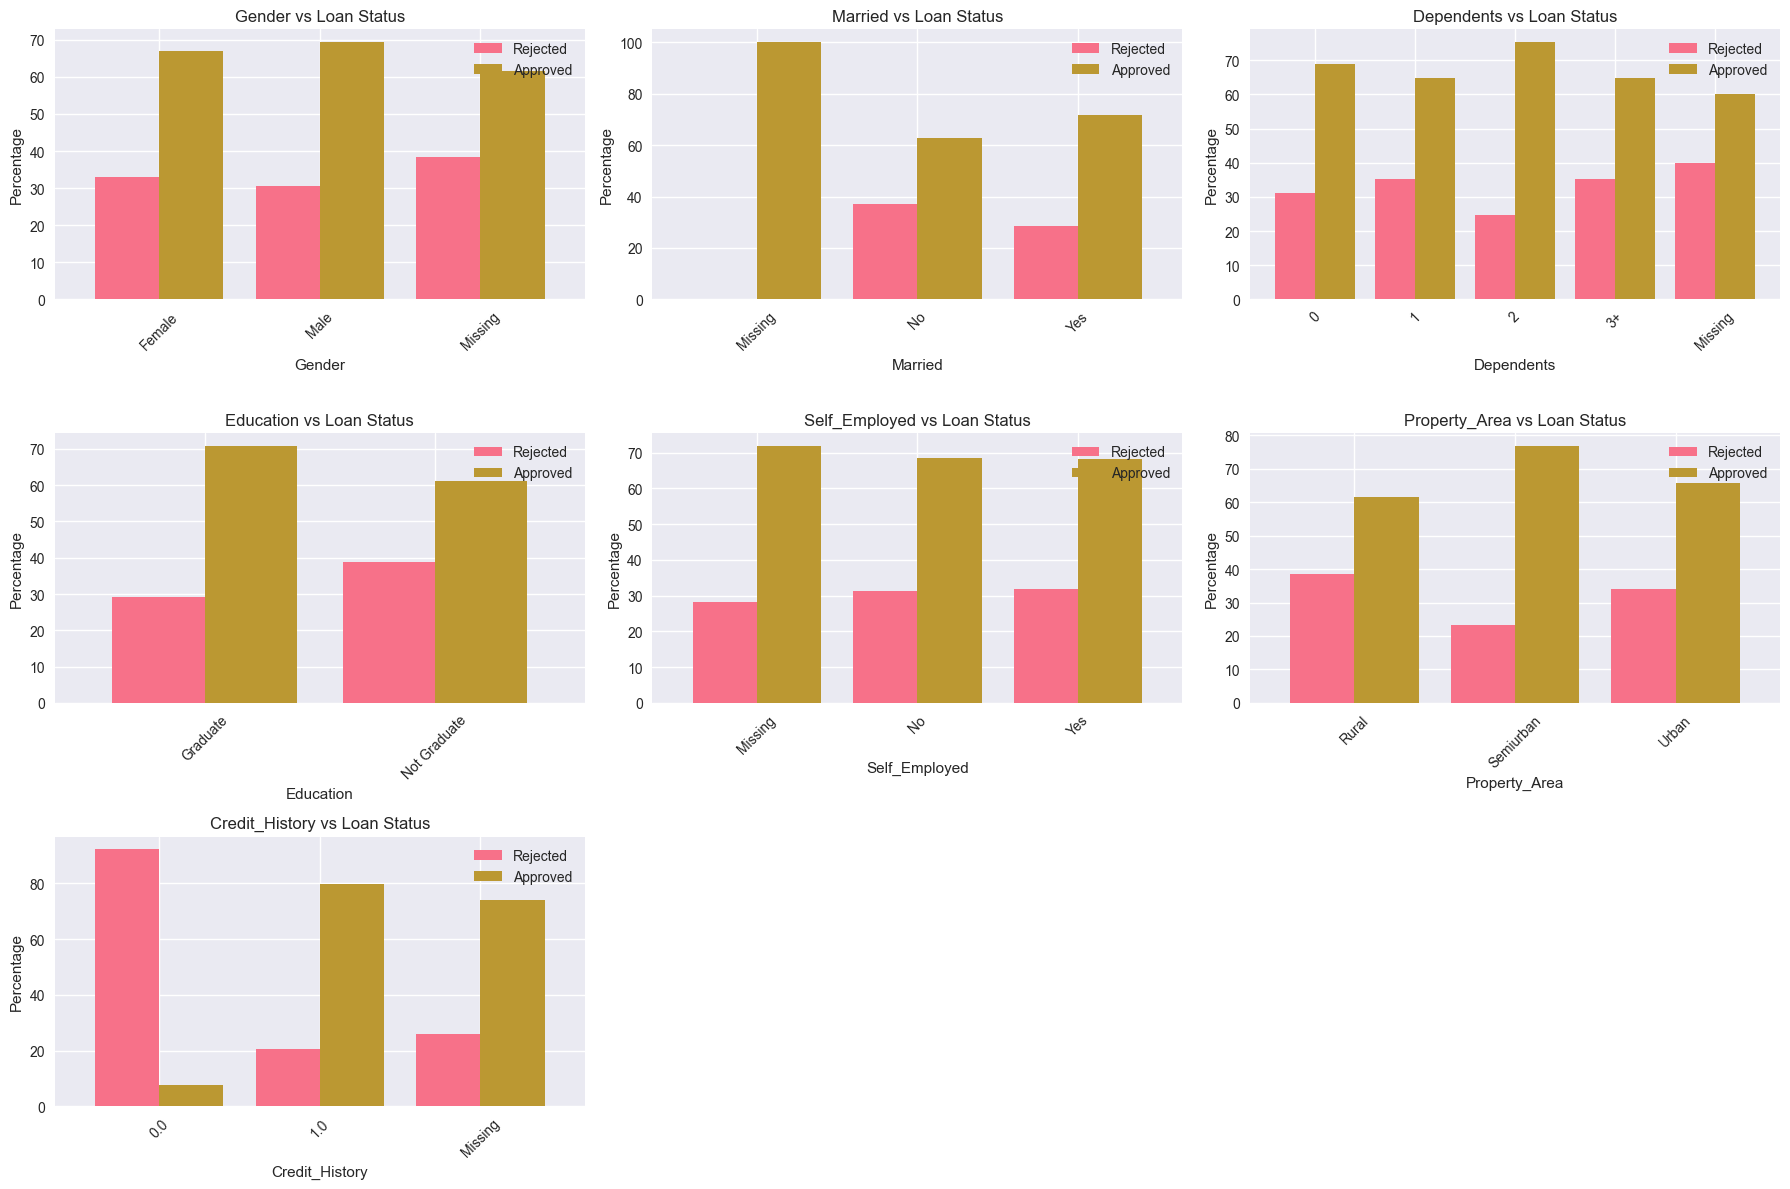

In [7]:
# Categorical feature analysis
plt.figure(figsize=(18, 12))

categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    
    if feature == 'Credit_History':
        # Handle Credit_History as it might have NaN values
        cross_tab = pd.crosstab(df[feature].fillna('Missing'), df['Loan_Status'], normalize='index') * 100
    else:
        cross_tab = pd.crosstab(df[feature].fillna('Missing'), df['Loan_Status'], normalize='index') * 100
    
    cross_tab.plot(kind='bar', ax=plt.gca(), width=0.8)
    plt.title(f'{feature} vs Loan Status')
    plt.xlabel(feature)
    plt.ylabel('Percentage')
    plt.legend(['Rejected', 'Approved'], loc='upper right')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Dropped Loan_ID for correlation analysis


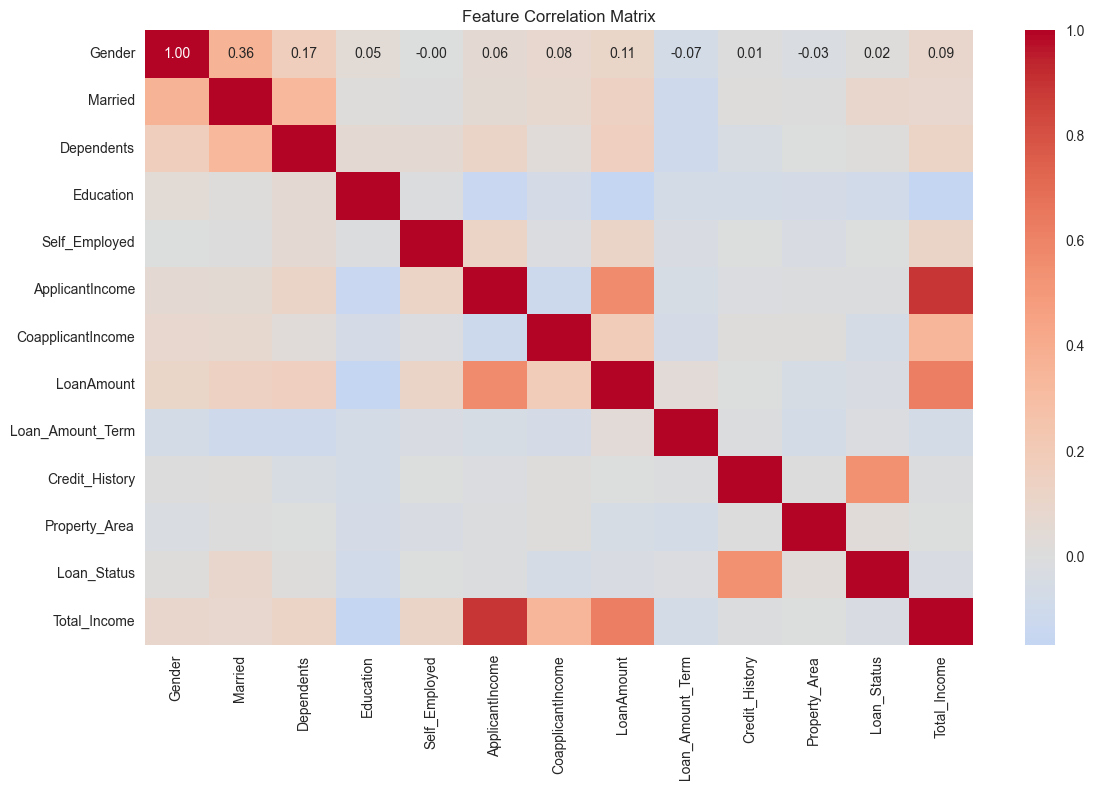


Correlation with Loan Status:
Credit_History       0.540556
Married              0.091478
Education            0.085884
CoapplicantIncome    0.059187
LoanAmount           0.033214
Property_Area        0.032112
Total_Income         0.031271
Loan_Amount_Term     0.022549
Gender               0.017987
Dependents           0.010118
ApplicantIncome      0.004710
Self_Employed        0.003700
Name: Loan_Status, dtype: float64


In [9]:
# Correlation analysis
plt.figure(figsize=(12, 8))

# Create a copy for correlation analysis
df_corr = df.copy()

# DROP LOAN_ID FIRST (this was missing and causing the error)
if 'Loan_ID' in df_corr.columns:
    df_corr = df_corr.drop('Loan_ID', axis=1)
    print("Dropped Loan_ID for correlation analysis")

# Handle missing values first
df_corr['Gender'].fillna(df_corr['Gender'].mode()[0], inplace=True)
df_corr['Married'].fillna(df_corr['Married'].mode()[0], inplace=True)
df_corr['Dependents'].fillna(df_corr['Dependents'].mode()[0], inplace=True)
df_corr['Self_Employed'].fillna(df_corr['Self_Employed'].mode()[0], inplace=True)
df_corr['LoanAmount'].fillna(df_corr['LoanAmount'].median(), inplace=True)
df_corr['Loan_Amount_Term'].fillna(df_corr['Loan_Amount_Term'].mode()[0], inplace=True)
df_corr['Credit_History'].fillna(df_corr['Credit_History'].mode()[0], inplace=True)

# Encode categorical variables for correlation
le = LabelEncoder()
categorical_cols_for_corr = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in categorical_cols_for_corr:
    if col in df_corr.columns:
        df_corr[col] = le.fit_transform(df_corr[col])

# Now calculate correlation matrix (should work without errors)
correlation_matrix = df_corr.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Show correlations with target variable
print("\nCorrelation with Loan Status:")
target_corr = correlation_matrix['Loan_Status'].abs().sort_values(ascending=False)
print(target_corr[target_corr.index != 'Loan_Status'])


## 4. Data Preprocessing

In [10]:
# Data preprocessing pipeline
print("=== DATA PREPROCESSING ===")

# Create a copy for preprocessing
df_processed = df.copy()

print(f"Original dataset shape: {df_processed.shape}")
print(f"Missing values before preprocessing:\n{df_processed.isnull().sum()[df_processed.isnull().sum() > 0]}")

# Handle missing values
print("\n1. Handling Missing Values:")

# Fill categorical missing values with mode
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in categorical_cols:
    if col in df_processed.columns and df_processed[col].isnull().any():
        mode_value = df_processed[col].mode()[0]
        df_processed[col].fillna(mode_value, inplace=True)
        print(f"  {col}: filled with mode '{mode_value}'")

# Fill numerical missing values
if df_processed['LoanAmount'].isnull().any():
    median_loan = df_processed['LoanAmount'].median()
    df_processed['LoanAmount'].fillna(median_loan, inplace=True)
    print(f"  LoanAmount: filled with median {median_loan}")

if df_processed['Loan_Amount_Term'].isnull().any():
    mode_term = df_processed['Loan_Amount_Term'].mode()[0]
    df_processed['Loan_Amount_Term'].fillna(mode_term, inplace=True)
    print(f"  Loan_Amount_Term: filled with mode {mode_term}")

if df_processed['Credit_History'].isnull().any():
    mode_credit = df_processed['Credit_History'].mode()[0]
    df_processed['Credit_History'].fillna(mode_credit, inplace=True)
    print(f"  Credit_History: filled with mode {mode_credit}")

print(f"\nMissing values after preprocessing:\n{df_processed.isnull().sum().sum()} (should be 0)")

=== DATA PREPROCESSING ===
Original dataset shape: (614, 14)
Missing values before preprocessing:
Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

1. Handling Missing Values:
  Gender: filled with mode 'Male'
  Married: filled with mode 'Yes'
  Dependents: filled with mode '0'
  Self_Employed: filled with mode 'No'
  LoanAmount: filled with median 128.0
  Loan_Amount_Term: filled with mode 360.0
  Credit_History: filled with mode 1.0

Missing values after preprocessing:
0 (should be 0)


In [11]:
# Feature Engineering
print("\n2. Feature Engineering:")

# Drop Loan_ID as it's not useful for prediction
if 'Loan_ID' in df_processed.columns:
    df_processed = df_processed.drop('Loan_ID', axis=1)
    print("  Dropped Loan_ID column")

# Create new features
df_processed['Total_Income'] = df_processed['ApplicantIncome'] + df_processed['CoapplicantIncome']
print("  Created Total_Income feature")

# Loan to income ratio
df_processed['Loan_Income_Ratio'] = df_processed['LoanAmount'] * 1000 / df_processed['Total_Income']
# Handle infinite values
df_processed['Loan_Income_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_processed['Loan_Income_Ratio'].fillna(df_processed['Loan_Income_Ratio'].median(), inplace=True)
print("  Created Loan_Income_Ratio feature")

# Income per dependent
dependents_numeric = df_processed['Dependents'].replace('3+', '3').astype(int)
df_processed['Income_per_Dependent'] = df_processed['Total_Income'] / (dependents_numeric + 1)
print("  Created Income_per_Dependent feature")

# Loan amount per term
df_processed['Loan_per_Term'] = df_processed['LoanAmount'] / df_processed['Loan_Amount_Term'] * 12
print("  Created Loan_per_Term feature")

print(f"\nProcessed dataset shape: {df_processed.shape}")
print("\nNew features summary:")
new_features = ['Total_Income', 'Loan_Income_Ratio', 'Income_per_Dependent', 'Loan_per_Term']
print(df_processed[new_features].describe())


2. Feature Engineering:
  Dropped Loan_ID column
  Created Total_Income feature
  Created Loan_Income_Ratio feature
  Created Income_per_Dependent feature
  Created Loan_per_Term feature

Processed dataset shape: (614, 16)

New features summary:
       Total_Income  Loan_Income_Ratio  Income_per_Dependent  Loan_per_Term
count    614.000000         614.000000            614.000000     614.000000
mean    7024.705081          23.876787           5024.998187       5.684245
std     6458.663872           8.707161           4757.062214       6.133612
min     1442.000000           2.522916            457.500000       0.300000
25%     4166.000000          19.220552           2354.375000       3.466667
50%     5416.500000          24.129209           4166.000000       4.333333
75%     7521.750000          28.158020           6000.000000       6.066667
max    81000.000000          82.711645          63337.000000     111.000000


## 5. Machine Learning Model Training

In [12]:
# Prepare data for machine learning
print("=== MACHINE LEARNING PREPARATION ===")

# Encode categorical variables
df_ml = df_processed.copy()
encoders = {}

categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

print("Encoding categorical variables:")
for col in categorical_cols:
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])
    encoders[col] = le
    print(f"  {col}: {list(le.classes_)} -> {list(range(len(le.classes_)))}")

# Encode target variable
target_encoder = LabelEncoder()
df_ml['Loan_Status'] = target_encoder.fit_transform(df_ml['Loan_Status'])
encoders['Loan_Status'] = target_encoder
print(f"  Loan_Status: {list(target_encoder.classes_)} -> {list(range(len(target_encoder.classes_)))}")

# Prepare features and target
X = df_ml.drop('Loan_Status', axis=1)
y = df_ml['Loan_Status']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature names: {list(X.columns)}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Train target distribution: {np.bincount(y_train)}")
print(f"Test target distribution: {np.bincount(y_test)}")

=== MACHINE LEARNING PREPARATION ===
Encoding categorical variables:
  Gender: ['Female', 'Male'] -> [0, 1]
  Married: ['No', 'Yes'] -> [0, 1]
  Dependents: ['0', '1', '2', '3+'] -> [0, 1, 2, 3]
  Education: ['Graduate', 'Not Graduate'] -> [0, 1]
  Self_Employed: ['No', 'Yes'] -> [0, 1]
  Property_Area: ['Rural', 'Semiurban', 'Urban'] -> [0, 1, 2]
  Loan_Status: ['N', 'Y'] -> [0, 1]

Features shape: (614, 15)
Target shape: (614,)
Feature names: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_Income', 'Loan_Income_Ratio', 'Income_per_Dependent', 'Loan_per_Term']

Train set: (491, 15)
Test set: (123, 15)
Train target distribution: [154 337]
Test target distribution: [38 85]


In [13]:
# Scale features for algorithms that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled for SVM and Logistic Regression")

Features scaled for SVM and Logistic Regression


In [14]:
# Train multiple models
print("=== MODEL TRAINING AND EVALUATION ===")

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use scaled data for SVM and Logistic Regression, original for Random Forest
    if name in ['SVM', 'Logistic Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        
        # Cross-validation with scaled data
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
        cv_roc_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        
        # Cross-validation with original data
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        cv_roc_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'cv_accuracy': cv_scores.mean(),
        'cv_accuracy_std': cv_scores.std(),
        'cv_roc_auc': cv_roc_scores.mean(),
        'cv_roc_auc_std': cv_roc_scores.std(),
        'predictions': y_pred,
        'probabilities': y_prob
    }
    
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"  CV ROC AUC: {cv_roc_scores.mean():.4f} (+/- {cv_roc_scores.std() * 2:.4f})")

=== MODEL TRAINING AND EVALUATION ===

Training Logistic Regression...
  Accuracy: 0.8618
  ROC AUC: 0.8310
  CV Accuracy: 0.7922 (+/- 0.0280)
  CV ROC AUC: 0.6996 (+/- 0.1104)

Training Random Forest...
  Accuracy: 0.8211
  ROC AUC: 0.8454
  CV Accuracy: 0.7760 (+/- 0.0592)
  CV ROC AUC: 0.7676 (+/- 0.0920)

Training SVM...
  Accuracy: 0.8374
  ROC AUC: 0.8393
  CV Accuracy: 0.7902 (+/- 0.0275)
  CV ROC AUC: 0.7450 (+/- 0.1190)


## 6. Model Evaluation and Comparison

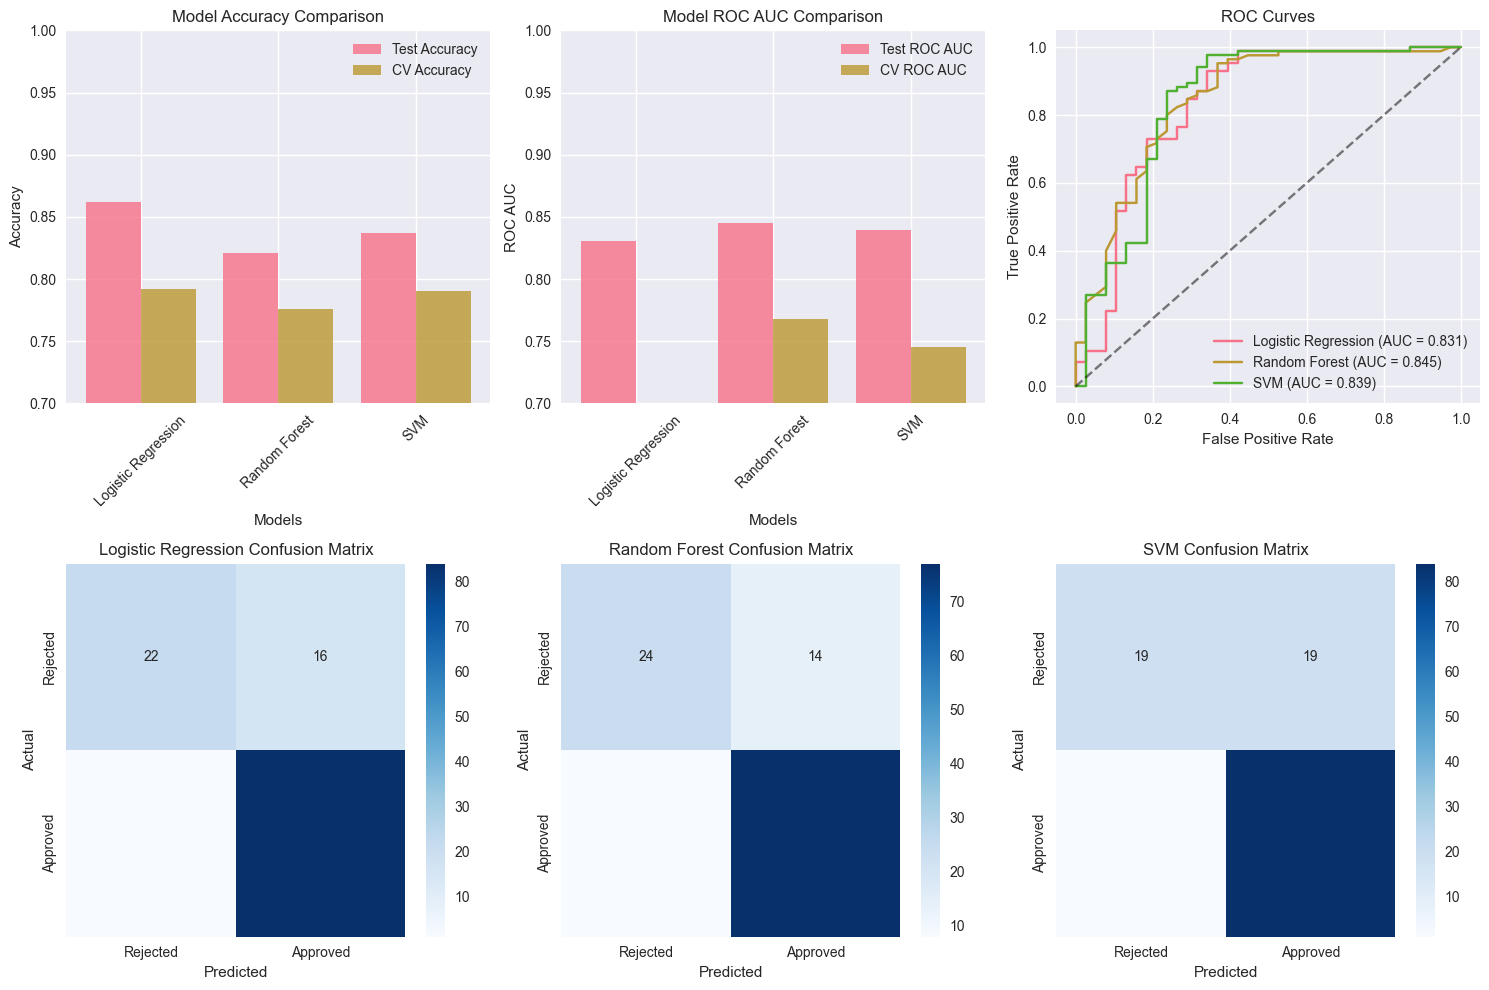

In [15]:
# Model comparison visualization
plt.figure(figsize=(15, 10))

# Accuracy comparison
plt.subplot(2, 3, 1)
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
cv_accuracies = [results[name]['cv_accuracy'] for name in model_names]

x_pos = np.arange(len(model_names))
plt.bar(x_pos - 0.2, accuracies, 0.4, label='Test Accuracy', alpha=0.8)
plt.bar(x_pos + 0.2, cv_accuracies, 0.4, label='CV Accuracy', alpha=0.8)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(x_pos, model_names, rotation=45)
plt.legend()
plt.ylim(0.7, 1.0)

# ROC AUC comparison
plt.subplot(2, 3, 2)
roc_aucs = [results[name]['roc_auc'] for name in model_names]
cv_roc_aucs = [results[name]['cv_roc_auc'] for name in model_names]

plt.bar(x_pos - 0.2, roc_aucs, 0.4, label='Test ROC AUC', alpha=0.8)
plt.bar(x_pos + 0.2, cv_roc_aucs, 0.4, label='CV ROC AUC', alpha=0.8)
plt.xlabel('Models')
plt.ylabel('ROC AUC')
plt.title('Model ROC AUC Comparison')
plt.xticks(x_pos, model_names, rotation=45)
plt.legend()
plt.ylim(0.7, 1.0)

# ROC Curves
plt.subplot(2, 3, 3)
for name in model_names:
    fpr, tpr, _ = roc_curve(y_test, results[name]['probabilities'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {results[name]['roc_auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()

# Confusion matrices
for i, name in enumerate(model_names):
    plt.subplot(2, 3, 4 + i)
    cm = confusion_matrix(y_test, results[name]['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Rejected', 'Approved'], 
                yticklabels=['Rejected', 'Approved'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

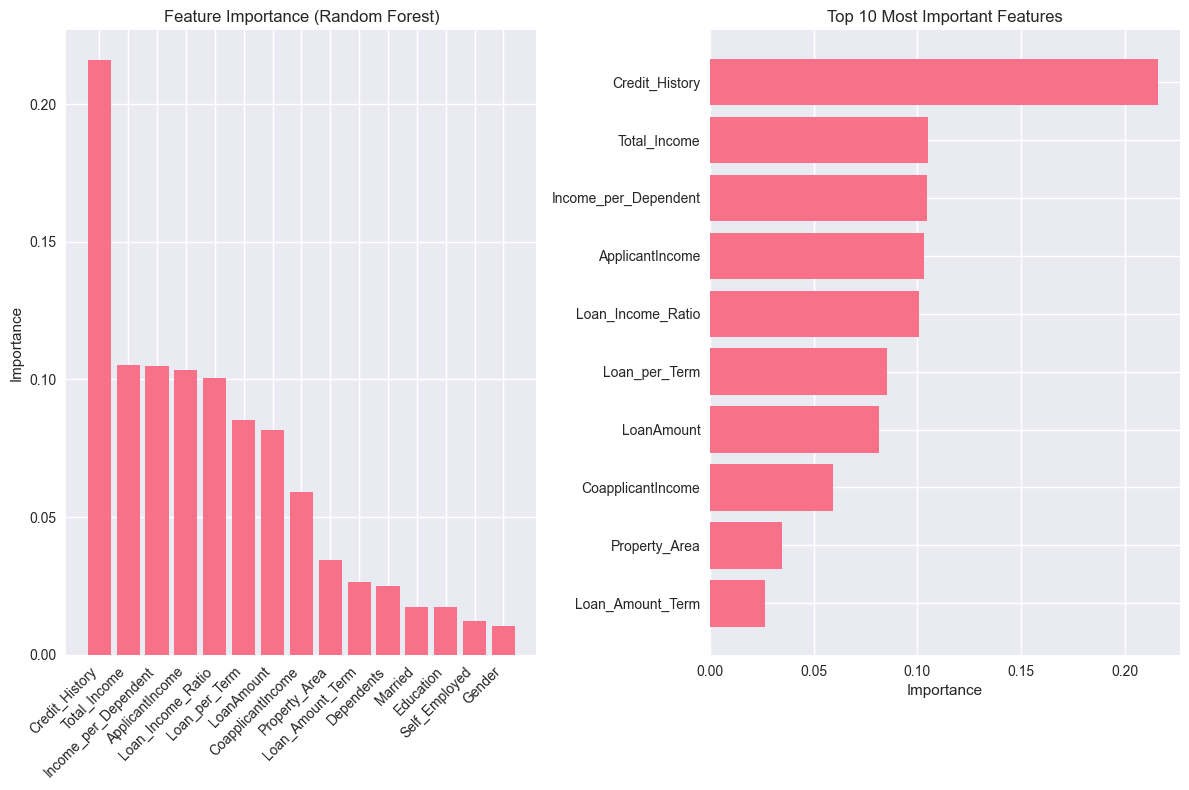

Feature Importance Ranking (Random Forest):
 1. Credit_History      : 0.2159
 2. Total_Income        : 0.1051
 3. Income_per_Dependent: 0.1049
 4. ApplicantIncome     : 0.1034
 5. Loan_Income_Ratio   : 0.1007
 6. Loan_per_Term       : 0.0854
 7. LoanAmount          : 0.0818
 8. CoapplicantIncome   : 0.0593
 9. Property_Area       : 0.0345
10. Loan_Amount_Term    : 0.0265
11. Dependents          : 0.0252
12. Married             : 0.0174
13. Education           : 0.0172
14. Self_Employed       : 0.0122
15. Gender              : 0.0106


In [16]:
# Feature importance analysis (Random Forest)
if 'Random Forest' in results:
    plt.figure(figsize=(12, 8))
    
    rf_model = results['Random Forest']['model']
    feature_names = X.columns
    importances = rf_model.feature_importances_
    
    # Sort features by importance
    indices = np.argsort(importances)[::-1]
    
    # Plot feature importance
    plt.subplot(1, 2, 1)
    plt.title('Feature Importance (Random Forest)')
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
    plt.ylabel('Importance')
    
    # Top 10 features
    plt.subplot(1, 2, 2)
    top_10_indices = indices[:10]
    plt.title('Top 10 Most Important Features')
    plt.barh(range(10), importances[top_10_indices])
    plt.yticks(range(10), [feature_names[i] for i in top_10_indices])
    plt.xlabel('Importance')
    plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
    # Print feature importance
    print("Feature Importance Ranking (Random Forest):")
    for i in range(len(importances)):
        idx = indices[i]
        print(f"{i+1:2d}. {feature_names[idx]:20s}: {importances[idx]:.4f}")

## 7. Model Performance Summary

In [17]:
# Create performance summary table
performance_data = []
for name, result in results.items():
    performance_data.append({
        'Model': name,
        'Test Accuracy': f"{result['accuracy']:.4f}",
        'CV Accuracy': f"{result['cv_accuracy']:.4f} ± {result['cv_accuracy_std']:.4f}",
        'Test ROC AUC': f"{result['roc_auc']:.4f}",
        'CV ROC AUC': f"{result['cv_roc_auc']:.4f} ± {result['cv_roc_auc_std']:.4f}"
    })

performance_df = pd.DataFrame(performance_data)
print("=== MODEL PERFORMANCE SUMMARY ===")
print(performance_df.to_string(index=False))

# Best model selection
best_model_name = max(results.keys(), key=lambda x: results[x]['cv_accuracy'])
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   CV Accuracy: {results[best_model_name]['cv_accuracy']:.4f}")
print(f"   Test Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"   ROC AUC: {results[best_model_name]['roc_auc']:.4f}")

=== MODEL PERFORMANCE SUMMARY ===
              Model Test Accuracy     CV Accuracy Test ROC AUC      CV ROC AUC
Logistic Regression        0.8618 0.7922 ± 0.0140       0.8310 0.6996 ± 0.0552
      Random Forest        0.8211 0.7760 ± 0.0296       0.8454 0.7676 ± 0.0460
                SVM        0.8374 0.7902 ± 0.0137       0.8393 0.7450 ± 0.0595

🏆 Best Model: Logistic Regression
   CV Accuracy: 0.7922
   Test Accuracy: 0.8618
   ROC AUC: 0.8310


## 8. Model Deployment Preparation

In [24]:
# Save models and preprocessing objects
print("=== SAVING MODELS FOR DEPLOYMENT ===")

import os

# Create models dictionary
trained_models = {name: result['model'] for name, result in results.items()}

# Ensure the ml_models directory exists in the Django project
django_ml_models_path = '../../finloan_ai_project/ml_models/'
os.makedirs(django_ml_models_path, exist_ok=True)

# Save models and preprocessing objects
joblib.dump(trained_models, f'{django_ml_models_path}loan_models.joblib')
joblib.dump(encoders, f'{django_ml_models_path}encoders.joblib')
joblib.dump(scaler, f'{django_ml_models_path}scaler.joblib')
joblib.dump(list(X.columns), f'{django_ml_models_path}features.joblib')

print("✅ Models saved successfully!")
print(f"   Saved to: {os.path.abspath(django_ml_models_path)}")
print("   - loan_models.joblib: All trained models")
print("   - encoders.joblib: Label encoders for categorical features")
print("   - scaler.joblib: StandardScaler for feature scaling")
print("   - features.joblib: Feature names list")

# Test model loading
try:
    loaded_models = joblib.load(f'{django_ml_models_path}loan_models.joblib')
    loaded_encoders = joblib.load(f'{django_ml_models_path}encoders.joblib')
    loaded_scaler = joblib.load(f'{django_ml_models_path}scaler.joblib')
    loaded_features = joblib.load(f'{django_ml_models_path}features.joblib')
    print("\n✅ Model loading test successful!")
    print(f"   Loaded {len(loaded_models)} models")
    print(f"   Loaded {len(loaded_encoders)} encoders")
    print(f"   Feature count: {len(loaded_features)}")
except Exception as e:
    print(f"❌ Error loading models: {e}")

# Also save to the current ml_models directory for backup
print("\n=== CREATING BACKUP COPY ===")
current_path = './'
try:
    joblib.dump(trained_models, f'{current_path}loan_models.joblib')
    joblib.dump(encoders, f'{current_path}encoders.joblib')
    joblib.dump(scaler, f'{current_path}scaler.joblib')
    joblib.dump(list(X.columns), f'{current_path}features.joblib')
    print("✅ Backup models saved in current directory")
except Exception as e:
    print(f"❌ Error creating backup: {e}")


=== SAVING MODELS FOR DEPLOYMENT ===
✅ Models saved successfully!
   Saved to: c:\Users\Home\Desktop\finloan_ai_project\ml_models
   - loan_models.joblib: All trained models
   - encoders.joblib: Label encoders for categorical features
   - scaler.joblib: StandardScaler for feature scaling
   - features.joblib: Feature names list

✅ Model loading test successful!
   Loaded 3 models
   Loaded 7 encoders
   Feature count: 15

=== CREATING BACKUP COPY ===
✅ Backup models saved in current directory


## 9. Sample Prediction Test

In [25]:
# Test prediction with sample data
print("=== SAMPLE PREDICTION TEST ===")

# Create sample applicant data
sample_applications = [
    {
        'Gender': 'Male',
        'Married': 'Yes', 
        'Dependents': '1',
        'Education': 'Graduate',
        'Self_Employed': 'No',
        'ApplicantIncome': 5000,
        'CoapplicantIncome': 2000,
        'LoanAmount': 150,
        'Loan_Amount_Term': 360,
        'Credit_History': 1.0,
        'Property_Area': 'Urban'
    },
    {
        'Gender': 'Female',
        'Married': 'No',
        'Dependents': '0',
        'Education': 'Not Graduate',
        'Self_Employed': 'Yes',
        'ApplicantIncome': 3000,
        'CoapplicantIncome': 0,
        'LoanAmount': 100,
        'Loan_Amount_Term': 360,
        'Credit_History': 0.0,
        'Property_Area': 'Rural'
    }
]

def predict_loan_approval(applicant_data, model_name='Random Forest'):
    """Make prediction for a single applicant"""
    # Create DataFrame
    input_df = pd.DataFrame([applicant_data])
    
    # Add engineered features
    input_df['Total_Income'] = input_df['ApplicantIncome'] + input_df['CoapplicantIncome']
    input_df['Loan_Income_Ratio'] = input_df['LoanAmount'] * 1000 / input_df['Total_Income']
    
    dependents_num = 1 if input_df['Dependents'].iloc[0] == '3+' else int(input_df['Dependents'].iloc[0])
    input_df['Income_per_Dependent'] = input_df['Total_Income'] / (dependents_num + 1)
    input_df['Loan_per_Term'] = input_df['LoanAmount'] / input_df['Loan_Amount_Term'] * 12
    
    # Encode categorical features
    for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
        if col in encoders:
            try:
                input_df[col] = encoders[col].transform(input_df[col])
            except ValueError:
                # Handle unseen labels
                input_df[col] = 0
    
    # Get model
    model = results[model_name]['model']
    
    # Make prediction
    if model_name in ['SVM', 'Logistic Regression']:
        input_scaled = scaler.transform(input_df)
        prediction = model.predict(input_scaled)[0]
        probabilities = model.predict_proba(input_scaled)[0]
    else:
        prediction = model.predict(input_df)[0]
        probabilities = model.predict_proba(input_df)[0]
    
    return {
        'approved': bool(prediction == 1),
        'approval_probability': float(probabilities[1] * 100),
        'rejection_probability': float(probabilities[0] * 100)
    }

# Test predictions
for i, sample in enumerate(sample_applications, 1):
    print(f"\n--- Sample Application {i} ---")
    print(f"Profile: {sample['Gender']}, {sample['Education']}, {sample['Married']}, Income: ${sample['ApplicantIncome'] + sample['CoapplicantIncome']}")
    
    for model_name in ['Random Forest', 'Logistic Regression', 'SVM']:
        result = predict_loan_approval(sample, model_name)
        status = "✅ APPROVED" if result['approved'] else "❌ REJECTED"
        print(f"  {model_name:18}: {status} ({result['approval_probability']:.1f}% confidence)")

=== SAMPLE PREDICTION TEST ===

--- Sample Application 1 ---
Profile: Male, Graduate, Yes, Income: $7000
  Random Forest     : ✅ APPROVED (78.0% confidence)
  Logistic Regression: ✅ APPROVED (84.7% confidence)
  SVM               : ✅ APPROVED (80.5% confidence)

--- Sample Application 2 ---
Profile: Female, Not Graduate, No, Income: $3000
  Random Forest     : ❌ REJECTED (17.0% confidence)
  Logistic Regression: ❌ REJECTED (4.1% confidence)
  SVM               : ❌ REJECTED (19.4% confidence)


## 10. Key Insights and Conclusions

In [26]:
# Generate insights
print("=== KEY INSIGHTS FROM ANALYSIS ===")
print(f"\n📊 Dataset Overview:")
print(f"   • Total applications: {len(df)}")
print(f"   • Approval rate: {df['Loan_Status'].value_counts(normalize=True)['Y']:.1%}")
print(f"   • Rejection rate: {df['Loan_Status'].value_counts(normalize=True)['N']:.1%}")

print(f"\n🎯 Model Performance:")
for name, result in sorted(results.items(), key=lambda x: x[1]['cv_accuracy'], reverse=True):
    print(f"   • {name}: {result['cv_accuracy']:.1%} accuracy (CV)")

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   • Cross-validation accuracy: {results[best_model_name]['cv_accuracy']:.1%}")
print(f"   • Test accuracy: {results[best_model_name]['accuracy']:.1%}")
print(f"   • ROC AUC: {results[best_model_name]['roc_auc']:.3f}")

if 'Random Forest' in results:
    rf_model = results['Random Forest']['model']
    feature_names = X.columns
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    print(f"\n🔍 Most Important Features (Random Forest):")
    for i in range(min(5, len(importances))):
        idx = indices[i]
        print(f"   {i+1}. {feature_names[idx]}: {importances[idx]:.1%}")

print(f"\n📈 Business Impact:")
print(f"   • AI model can automate loan decisions with {results[best_model_name]['accuracy']:.1%} accuracy")
print(f"   • Reduces manual review time and improves consistency")
print(f"   • Credit history is the most important factor for approval")
print(f"   • Total income and education level are also significant predictors")

print(f"\n✅ Ready for Production:")
print(f"   • Models saved and ready for Django integration")
print(f"   • Preprocessing pipeline established")
print(f"   • Feature engineering optimized for real-time predictions")
print(f"   • Comprehensive evaluation completed")

print("\n🎉 Analysis Complete! The FinLoan AI system is ready for deployment.")

=== KEY INSIGHTS FROM ANALYSIS ===

📊 Dataset Overview:
   • Total applications: 614
   • Approval rate: 68.7%
   • Rejection rate: 31.3%

🎯 Model Performance:
   • Logistic Regression: 79.2% accuracy (CV)
   • SVM: 79.0% accuracy (CV)
   • Random Forest: 77.6% accuracy (CV)

🏆 Best Model: Logistic Regression
   • Cross-validation accuracy: 79.2%
   • Test accuracy: 86.2%
   • ROC AUC: 0.831

🔍 Most Important Features (Random Forest):
   1. Credit_History: 21.6%
   2. Total_Income: 10.5%
   3. Income_per_Dependent: 10.5%
   4. ApplicantIncome: 10.3%
   5. Loan_Income_Ratio: 10.1%

📈 Business Impact:
   • AI model can automate loan decisions with 86.2% accuracy
   • Reduces manual review time and improves consistency
   • Credit history is the most important factor for approval
   • Total income and education level are also significant predictors

✅ Ready for Production:
   • Models saved and ready for Django integration
   • Preprocessing pipeline established
   • Feature engineering o